# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).

In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. 

> For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

---

# Some Notable Clustering Routines
---

<br>

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

<br>
---
The following are few well-known clustering algorithms. 

- `sklearn.cluster.KMeans`:  <br>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor). <br>  



- `sklearn.cluster.MeanShift`:<br>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.<br>  



- `sklearn.cluster.DBSCAN`: <br>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).<br>  



- `sklearn.cluster.AffinityPropagation`: <br>
    Clustering algorithm based on message passing between data points.<br>  



- `sklearn.cluster.SpectralClustering`: <br>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.<br>  



- `sklearn.cluster.Ward`: <br>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).<br>  
    

Of these, `Ward, SpectralClustering, DBSCAN` and `Affinity Propagation` can also work with precomputed similarity matrices.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find: argminS∑i=1k∑x∈Si∥x−μi∥2

 

## Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

In [2]:
# import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
import sklearn.cluster as cluster

In [4]:
print( dir(cluster))

['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'DBSCAN', 'FeatureAgglomeration', 'KMeans', 'MeanShift', 'MiniBatchKMeans', 'OPTICS', 'SpectralBiclustering', 'SpectralClustering', 'SpectralCoclustering', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_affinity_propagation', '_agglomerative', '_bicluster', '_birch', '_dbscan', '_dbscan_inner', '_feature_agglomeration', '_hierarchical_fast', '_k_means_elkan', '_k_means_fast', '_k_means_lloyd', '_kmeans', '_mean_shift', '_optics', '_spectral', 'affinity_propagation', 'cluster_optics_dbscan', 'cluster_optics_xi', 'compute_optics_graph', 'dbscan', 'estimate_bandwidth', 'get_bin_seeds', 'k_means', 'kmeans_plusplus', 'linkage_tree', 'mean_shift', 'spectral_clustering', 'ward_tree']


In [5]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [6]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [7]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [8]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [9]:
# reading data into dataframe
telco = pd.read_csv('telco_csv.csv')

In [10]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [11]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [12]:
telco_num = telco.select_dtypes(['float64', 'int64', 'float32', 'int32'])
telco_object = telco.select_dtypes(['object'])

In [13]:
telco_num.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [14]:
telco_object.columns

Index([], dtype='object')

In [15]:
num_summary = telco_num.apply(continuous_var_summary)
num_summary

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
N,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,2022.000000,35526.000000,41684.000000,495.000000,11551.000000,77535.000000,2671.000000,10987.000000,47.000000,517.000000,...,485.000000,493.000000,502.000000,11723.100000,13274.000000,14219.800000,13781.000000,11583.900000,371.000000,2487.000000
MEAN,2.022000,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
MEDIAN,2.000000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
STD,0.816200,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
VAR,0.666182,456.241566,157.723868,0.250225,101.741140,11458.453228,1.494253,101.648479,0.044836,0.249961,...,0.250025,0.250201,0.250246,107.401848,285.681731,363.609172,198.373037,388.855747,0.233593,1.255086
MIN,1.000000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P1,1.000000,1.000000,20.000000,0.000000,0.000000,10.990000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.650000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P5,1.000000,4.000000,23.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.997500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
# Handling Outliers
telco_num = telco_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

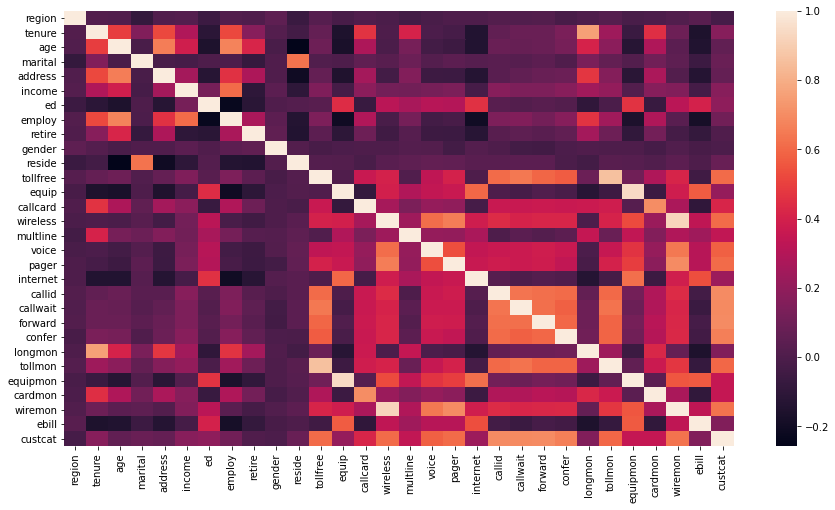

In [17]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(telco_num.corr())
plt.show()

In [18]:
telco_num.corr().to_excel('telco_data_corr.xlsx')

### Standardrizing data 
- To put data on the same scale 

In [20]:
telco_num.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [21]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)
telco_num.drop( ['ed', 'address', 'marital', 'reside', 'retire', 'gender','region',
                    'custcat', 'employ'], 
               axis = 1, inplace = True)

In [22]:
telco_num.columns

Index(['tenure', 'age', 'income', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill'],
      dtype='object')

In [23]:
# standardize the data
sc = StandardScaler()
telco_scaled = sc.fit_transform(telco_num)

In [24]:
pd.DataFrame(telco_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.055125,0.189446,-0.126231,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,0.802534,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,0.544543,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.526115,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,-0.564814,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


In [25]:
telco_scaled.shape

(1000, 21)

### Variable reduction: applying PCA

In [ ]:
telco_scaled.shape

In [26]:
pc = PCA( n_components = 21 ).fit( telco_scaled )

In [27]:
pc.explained_variance_   # eigen values

array([6.52134038, 3.9776234 , 2.46936345, 1.04012658, 0.86491769,
       0.79310632, 0.59854502, 0.57141705, 0.55152862, 0.47889598,
       0.45990275, 0.44720761, 0.41966032, 0.3879825 , 0.35893599,
       0.35066293, 0.30365376, 0.21405689, 0.11564558, 0.06920824,
       0.02723996])

In [28]:
# eigen values
sum(pc.explained_variance_)

21.021021021021024

In [29]:
pc.explained_variance_ / sum(pc.explained_variance_)

array([0.31022948, 0.18922123, 0.11747115, 0.04948031, 0.04114537,
       0.0377292 , 0.02847364, 0.02718313, 0.026237  , 0.02278177,
       0.02187823, 0.0212743 , 0.01996384, 0.01845688, 0.0170751 ,
       0.01668154, 0.01444524, 0.01018299, 0.00550143, 0.00329233,
       0.00129584])

In [30]:
# amount of variance that each PC explains
pc.explained_variance_ratio_

array([0.31022948, 0.18922123, 0.11747115, 0.04948031, 0.04114537,
       0.0377292 , 0.02847364, 0.02718313, 0.026237  , 0.02278177,
       0.02187823, 0.0212743 , 0.01996384, 0.01845688, 0.0170751 ,
       0.01668154, 0.01444524, 0.01018299, 0.00550143, 0.00329233,
       0.00129584])

In [35]:
# cumulative variance explained
var = np.round( np.cumsum( pc.explained_variance_ratio_) * 100, 2 )
var

array([ 31.02,  49.95,  61.69,  66.64,  70.75,  74.53,  77.38,  80.09,
        82.72,  85.  ,  87.18,  89.31,  91.31,  93.15,  94.86,  96.53,
        97.97,  98.99,  99.54,  99.87, 100.  ])

In [36]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 
                  'VAR': np.round(pc.explained_variance_ratio_*100, 2), 
                      'Cumm_VAR': var}, index = range(1, 22))

,Eigen_Values,VAR,Cumm_VAR
1,6.521340,31.02,31.02
2,3.977623,18.92,49.95
3,2.469363,11.75,61.69
4,1.040127,4.95,66.64
5,0.864918,4.11,70.75
6,0.793106,3.77,74.53
7,0.598545,2.85,77.38
8,0.571417,2.72,80.09
9,0.551529,2.62,82.72
10,0.478896,2.28,85.00


number of components have choosen as 6 based on cumulative variacne is explaining > 75 % and individual component explaining > 0.8 variance

In [37]:
pc_final = PCA( n_components = 6 ).fit( telco_scaled )

In [38]:
pc_final

PCA(n_components=6)

In [39]:
pc_final.explained_variance_

array([6.52134038, 3.9776234 , 2.46936345, 1.04011793, 0.86488626,
       0.79289999])

In [40]:
telco_scaled.shape

(1000, 21)

In [41]:
reduced_cr = pc_final.transform( telco_scaled )  # the out put is Components (C1, C2, ...)

In [42]:
dimensions = pd.DataFrame(reduced_cr)

In [43]:
dimensions.shape

(1000, 6)

In [44]:
dimensions.columns = [ "C1", "C2", "C3", "C4", "C5", "C6" ]

In [45]:
pd.DataFrame( telco_scaled ).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.055125,0.189446,-0.126231,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,0.802534,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,0.544543,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.526115,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,-0.564814,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


In [46]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-2.383811,0.647608,-0.881699,-0.173933,1.350337,0.012357
1,2.823847,0.602267,-2.638562,0.465445,1.453419,-1.612045
2,0.393342,3.238086,0.195578,-0.029946,0.223314,0.917114
3,-3.435344,-0.028501,-0.631407,0.200994,-0.124921,-1.039091
4,-1.890974,0.430334,-2.174681,0.197499,-0.397100,-0.278792


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [49]:
# pc_final.components_
# print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,
                         columns = telco_num.columns).T

In [52]:
Loadings.to_excel("Loadings.xlsx")

### Clustering 

In [53]:
dimensions.shape

(1000, 6)

In [54]:
km_3 = KMeans( n_clusters = 3, random_state = 123 ).fit( dimensions )

In [55]:
km_3.labels_

array([1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0,

In [57]:
km_4 = KMeans( n_clusters = 4, random_state = 123).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 123).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 123).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 123).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 123).fit( dimensions )
km_9 = KMeans( n_clusters = 9, random_state = 123).fit( dimensions )
km_10 = KMeans( n_clusters = 10, random_state = 123).fit( dimensions )

In [58]:
# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_
telco_num['cluster_9'] = km_9.labels_
telco_num['cluster_10'] = km_10.labels_

In [59]:
telco_num.head(10)

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,...,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,13,44.0,64.0,0,0,1,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3
1,11,33.0,136.0,1,0,1,1,0,1,1,...,35.7,0,0,0,1,4,0,1,7,0
2,68,52.0,116.0,1,0,1,0,0,0,0,...,0.0,0,0,0,1,4,6,3,0,7
3,33,33.0,33.0,0,0,0,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3
4,23,30.0,30.0,0,0,0,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3
5,41,39.0,78.0,1,0,1,0,0,0,0,...,0.0,0,0,0,1,4,6,6,3,5
6,45,22.0,19.0,0,0,1,0,1,0,0,...,0.0,1,1,1,0,5,1,0,8,1
7,38,35.0,76.0,1,1,1,1,1,1,1,...,64.9,1,2,2,2,1,4,7,4,6
8,45,59.0,166.0,1,0,1,0,1,0,0,...,0.0,0,0,0,1,4,3,3,0,7
9,68,41.0,72.0,0,0,1,0,1,0,0,...,0.0,0,1,3,4,3,2,5,6,8


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


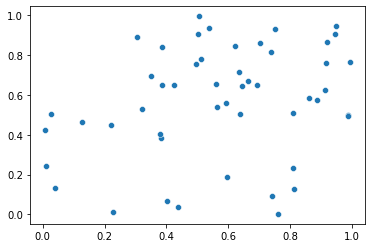

In [60]:
sns.scatterplot( np.random.rand(50), np.random.rand(50) )
plt.show()

### Analysis of the cluster size | Count method

In [61]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.485
0    0.296
2    0.219
dtype: float64

In [62]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.316
0    0.272
2    0.215
3    0.197
dtype: float64

In [63]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.244
3    0.216
2    0.198
0    0.177
4    0.165
dtype: float64

In [64]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

4    0.204
0    0.186
1    0.185
5    0.175
3    0.162
2    0.088
dtype: float64

In [65]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

5    0.184
1    0.172
4    0.167
6    0.165
2    0.151
0    0.088
3    0.073
dtype: float64

In [66]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

2    0.167
6    0.165
7    0.159
4    0.137
5    0.134
3    0.094
0    0.075
1    0.069
dtype: float64

In [67]:
pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())

5    0.176
3    0.151
6    0.134
1    0.119
2    0.108
0    0.089
4    0.076
8    0.074
7    0.073
dtype: float64

In [69]:
pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())

3    0.162
5    0.138
8    0.131
9    0.124
6    0.108
0    0.077
2    0.076
7    0.074
1    0.067
4    0.043
dtype: float64

### Choosing number clusters using Silhouette Coefficient   -- SC

method of interpretation and validation of consistency within clusters of data. 

In [70]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score( dimensions, km_3.labels_ )

0.2993075193638337

In [71]:
# calculate SC for K=3 through K=20
k_range = range(3, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit( dimensions )
    scores.append( metrics.silhouette_score(dimensions, km.labels_) )

In [72]:
scores

[0.2993075193638337,
 0.27945884676751337,
 0.2705005336840519,
 0.2761778444331787,
 0.26313742570375176,
 0.2617887040698452,
 0.2586782448469543,
 0.25978650369357165,
 0.2454348559154331,
 0.24497506496248223,
 0.2555970025275439,
 0.2252206730090134,
 0.24383347485349202,
 0.2435386049471017,
 0.2520357102364285,
 0.22561829514018117,
 0.22997840380454715,
 0.2324340770967973]

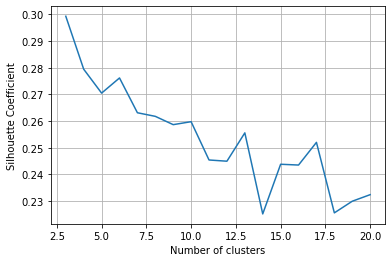

In [73]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 6 segment solution is best

### Segment Distribution

In [ ]:
telco_num.cluster_6.value_counts()/sum(telco_num.cluster_6.value_counts())

### Elbow Analysis 

method to understand how much variance is explained by increase of each cluster

In [74]:
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [76]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(5)

,num_clusters,cluster_errors
0,2,10721.429146
1,3,8323.370104
2,4,7034.083640
3,5,6189.817389
4,6,5536.811563


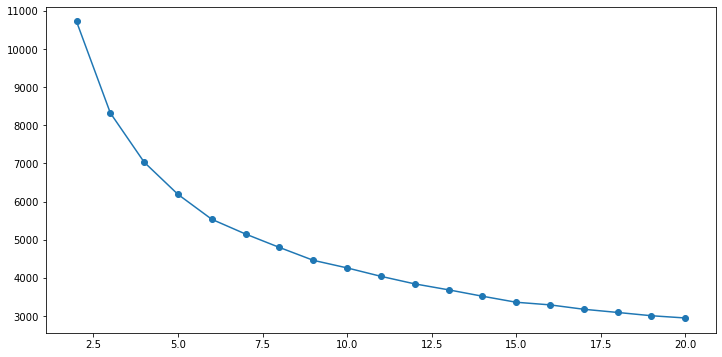

In [77]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

# Profiling

In [78]:
telco_num.shape[0]

1000

In [79]:
telco_num.cluster_3.value_counts()

1    485
0    296
2    219
Name: cluster_3, dtype: int64

In [80]:
telco_num.cluster_3.value_counts() / telco_num.shape[0]

1    0.485
0    0.296
2    0.219
Name: cluster_3, dtype: float64

In [ ]:
telco_num.cluster_3.value_counts() * 100 / sum(telco_num.cluster_3.value_counts())

In [81]:
size = pd.concat( [pd.Series( telco_num.shape[0] ), 
                   pd.Series.sort_index(telco_num.cluster_3.value_counts()), 
                   pd.Series.sort_index(telco_num.cluster_4.value_counts()),
                   pd.Series.sort_index(telco_num.cluster_5.value_counts()), 
                   pd.Series.sort_index(telco_num.cluster_6.value_counts()),
                   pd.Series.sort_index(telco_num.cluster_7.value_counts()), 
                   pd.Series.sort_index(telco_num.cluster_8.value_counts()),
                   pd.Series.sort_index(telco_num.cluster_9.value_counts()), 
                   pd.Series.sort_index(telco_num.cluster_10.value_counts())
                  ]
                )

In [86]:
size.head(2)

0    1000
0     296
dtype: int64

In [87]:
Seg_size = pd.DataFrame( size, columns = ['Seg_size'] )
Seg_Pct = pd.DataFrame( size / telco_num.shape[0], columns = ['Seg_Pct'] )

In [88]:
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
Seg_size,1000,296,485,219,272,316,215,197,177,244,...,77,67,76,162,43,138,108,74,131,124


In [89]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
Seg_Pct,1.0,0.296,0.485,0.219,0.272,0.316,0.215,0.197,0.177,0.244,...,0.077,0.067,0.076,0.162,0.043,0.138,0.108,0.074,0.131,0.124


In [90]:
pd.concat( [Seg_size.T, Seg_Pct.T], axis = 0 )

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
Seg_size,1000.0,296.000,485.000,219.000,272.000,316.000,215.000,197.000,177.000,244.000,...,77.000,67.000,76.000,162.000,43.000,138.000,108.000,74.000,131.000,124.000
Seg_Pct,1.0,0.296,0.485,0.219,0.272,0.316,0.215,0.197,0.177,0.244,...,0.077,0.067,0.076,0.162,0.043,0.138,0.108,0.074,0.131,0.124


In [91]:
telco_num.head()

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,...,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,13,44.0,64.0,0,0,1,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3
1,11,33.0,136.0,1,0,1,1,0,1,1,...,35.7,0,0,0,1,4,0,1,7,0
2,68,52.0,116.0,1,0,1,0,0,0,0,...,0.0,0,0,0,1,4,6,3,0,7
3,33,33.0,33.0,0,0,0,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3
4,23,30.0,30.0,0,0,0,0,0,0,0,...,0.0,0,1,1,3,0,5,2,5,3


In [93]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Profling_output = pd.concat( [telco_num.apply(lambda x: x.mean()).T, 
                              telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                              telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
                              telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                              telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
                              telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                              telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T,
                              telco_num.groupby('cluster_9').apply(lambda x: x.mean()).T,
                              telco_num.groupby('cluster_10').apply(lambda x: x.mean()).T], axis = 1 )

In [94]:
Profling_output.head(2)

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
tenure,35.5260,42.922297,31.527835,34.383562,39.981618,20.405063,34.265116,55.005076,25.99435,41.163934,...,27.610390,52.731343,21.513158,22.049383,56.906977,29.34058,39.194444,64.270270,53.503817,17.467742
age,41.6451,46.270405,39.563010,40.004566,45.400809,35.579146,39.841860,48.157716,36.99435,46.036967,...,37.519481,43.746269,33.894737,36.216111,56.953488,40.98558,42.324074,53.067973,48.763740,35.411290


In [95]:
Profling_output_final = pd.concat( [Seg_size.T, Seg_Pct.T, Profling_output], axis = 0 ).round(2)

In [96]:
Profling_output_final.head(2)

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
Seg_size,1000.0,296.0,485.00,219.00,272.00,316.00,215.00,197.0,177.00,244.00,...,77.00,67.00,76.00,162.00,43.00,138.00,108.00,74.00,131.00,124.00
Seg_Pct,1.0,0.3,0.48,0.22,0.27,0.32,0.22,0.2,0.18,0.24,...,0.08,0.07,0.08,0.16,0.04,0.14,0.11,0.07,0.13,0.12


In [97]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 
                    'KM3_1', 'KM3_2', 'KM3_3',
                    'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9',
    'KM10_1', 'KM10_2', 'KM10_3', 'KM10_4', 'KM10_5','KM10_6','KM10_7','KM10_8','KM10_9','KM10_10']

In [98]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM10_1,KM10_2,KM10_3,KM10_4,KM10_5,KM10_6,KM10_7,KM10_8,KM10_9,KM10_10
Seg_size,1000.00,296.00,485.00,219.00,272.00,316.00,215.00,197.00,177.00,244.00,...,77.00,67.00,76.00,162.00,43.00,138.00,108.00,74.00,131.00,124.00
Seg_Pct,1.00,0.30,0.48,0.22,0.27,0.32,0.22,0.20,0.18,0.24,...,0.08,0.07,0.08,0.16,0.04,0.14,0.11,0.07,0.13,0.12
tenure,35.53,42.92,31.53,34.38,39.98,20.41,34.27,55.01,25.99,41.16,...,27.61,52.73,21.51,22.05,56.91,29.34,39.19,64.27,53.50,17.47
age,41.65,46.27,39.56,40.00,45.40,35.58,39.84,48.16,36.99,46.04,...,37.52,43.75,33.89,36.22,56.95,40.99,42.32,53.07,48.76,35.41
income,73.79,96.14,55.95,83.08,92.27,47.20,81.73,82.23,54.82,97.24,...,56.29,70.00,59.39,44.25,273.90,58.51,82.57,106.99,76.90,50.95
tollfree,0.47,0.86,0.09,0.80,0.90,0.11,0.81,0.10,0.11,0.93,...,0.92,0.10,0.47,0.10,0.88,0.87,0.94,0.89,0.05,0.10
equip,0.39,0.05,0.36,0.89,0.04,0.43,0.88,0.25,0.94,0.05,...,0.17,0.90,0.99,0.00,0.19,0.07,0.98,0.08,0.00,0.88
callcard,0.68,0.92,0.44,0.87,0.91,0.14,0.88,0.99,0.33,0.95,...,0.97,0.99,0.54,0.14,0.95,0.85,0.98,0.99,1.00,0.05
wireless,0.30,0.22,0.04,0.96,0.24,0.05,0.97,0.03,0.15,0.28,...,0.90,0.15,0.87,0.01,0.72,0.02,1.00,0.07,0.00,0.02
multline,0.48,0.38,0.43,0.71,0.33,0.34,0.71,0.64,0.64,0.34,...,0.32,0.88,0.63,0.17,0.70,0.09,0.80,0.78,0.53,0.49


In [99]:
Profling_output_final.to_excel('Profiling_output.xlsx')

### Assigning segments to new data (Predicting segment for new data)

In [ ]:
new_cust = pd.read_csv('Telco_new_cust.csv')

In [ ]:
new_cust.head(2)

In [ ]:
new_cust.shape

In [ ]:
new_cust1 = new_cust.drop( columns = ['ed', 'address', 'marital', 'reside', 'retire', 'gender',
                                      'region', 'custcat', 'employ'])

In [ ]:
new_cust1

In [ ]:
new_cust_scaled = sc.transform( new_cust1 )

In [ ]:
new_cust_scaled = pd.DataFrame( new_cust_scaled, columns = new_cust1.columns )

In [ ]:
reduced_cr_new = pc_final.transform( new_cust_scaled )

In [ ]:
dimensions_new = pd.DataFrame( reduced_cr_new )

In [ ]:
dimensions_new.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [ ]:
dimensions_new.head(2)

##### final prediction with 5 cluster solutions

In [ ]:
km_5.predict( dimensions_new )

In [ ]:
new_cust['pred_segment'] = pd.Series( km_5.predict( dimensions_new ) )

In [ ]:
new_cust.head()

##  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [ ]:
# DBSCAN with eps = 1 and min_samples = 3
from sklearn.cluster import DBSCAN

db = DBSCAN( eps = 1.9, min_samples = 10)
db.fit( telco_scaled )

In [ ]:
pd.Series(db.labels_).value_counts()

In [ ]:
# review the cluster labels
db.labels_

In [ ]:
# save the cluster labels and sort by cluster
telco_num['DB_cluster'] = db.labels_

In [ ]:
# review the cluster centers
telco_num.groupby('DB_cluster').mean()